#### Using the data from Question 4, write code to analyze the data and answer the following questions 
##### Note 
- 1. Draw plots to demonstrate the analysis for the following questions for better visualizations 
- 2. Write code comments wherever required for code understanding
##### Insights to be drawn 
- Get all the Earth meteorites that fell before the year 2000
- Get all the earth meteorites co-ordinates who fell before the year 1970
- Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [66]:
df = pd.read_csv('meteorite_data.csv')
df.head()

,Name of Earth Meteorite,id,nametype,recclass,mass,hit,year,reclat,reclong,point coordinates
0,Aachen,1,Valid,L5,21.0,1880-01-01 00:00:00,1880.0,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,1951-01-01 00:00:00,1951.0,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,1952-01-01 00:00:00,1952.0,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01 00:00:00,1976.0,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,1902-01-01 00:00:00,1902.0,-33.16667,-64.95000,"[-64.95, -33.16667]"


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name of Earth Meteorite  1000 non-null   object 
 1   id                       1000 non-null   int64  
 2   nametype                 1000 non-null   object 
 3   recclass                 1000 non-null   object 
 4   mass                     972 non-null    float64
 5   hit                      999 non-null    object 
 6   year                     999 non-null    float64
 7   reclat                   988 non-null    float64
 8   reclong                  988 non-null    float64
 9   point coordinates        1000 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 78.2+ KB


<AxesSubplot:xlabel='year', ylabel='Count'>

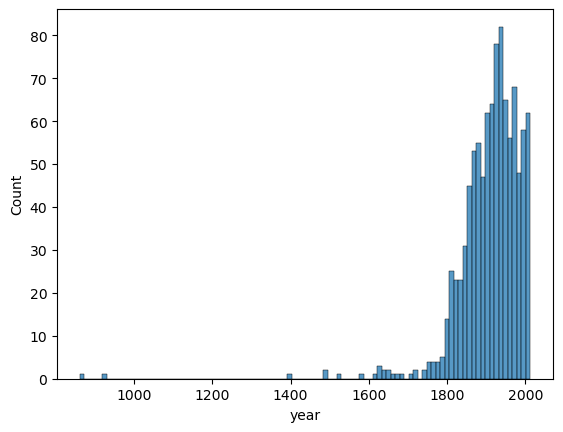

In [68]:
sns.histplot(data=df, x='year',bins=100)

In [69]:
# Get all the Earth meteorites that fell before the year 2000
before_2000 = df[df['year']<2000]
print(f"{len(before_2000)} out of {len(df)} are the Earth meteorites that fell before the year 2000")           

929 out of 1000 are the Earth meteorites that fell before the year 2000


In [71]:
import ast
df['point coordinates'] = df['point coordinates'].apply(ast.literal_eval)
# splitting the couourtinates
df[['Longitude', 'Latitude']] = df['point coordinates'].apply(pd.Series)


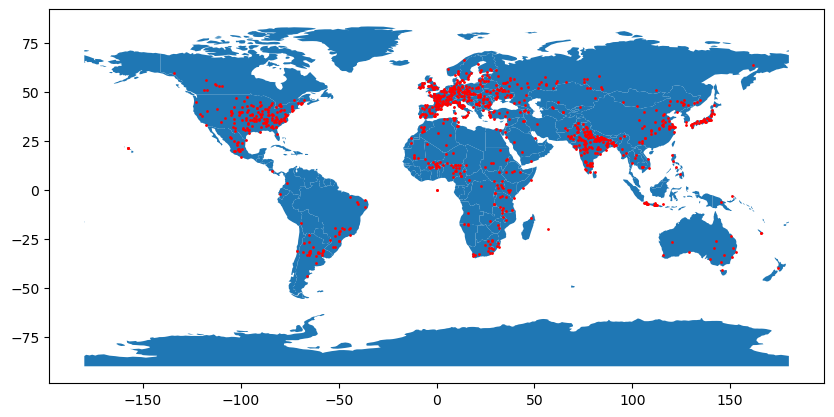

In [72]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=1);

In [70]:
# Get all the earth meteorites co-ordinates who fell before the year 1970
coordinate_before_1970 = df[df['year']<1970]['point coordinates']
print(f"{len(coordinate_before_1970)} out of {len(df)} are the earth meteorites co-ordinates who fell before the year 1970")   

780 out of 1000 are the earth meteorites co-ordinates who fell before the year 1970


<AxesSubplot:xlabel='mass', ylabel='Count'>

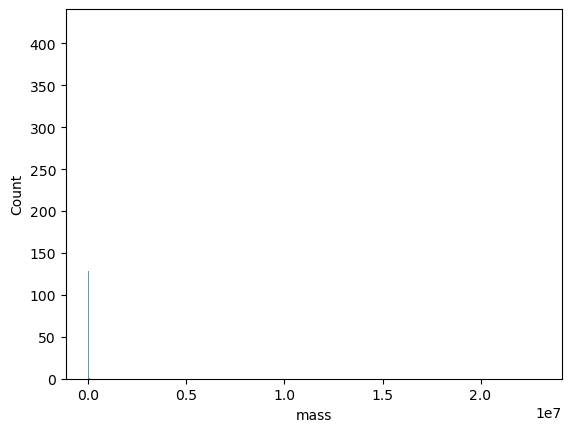

In [78]:
sns.histplot(data=df, x='mass')

In [38]:
# Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg
more_mass=df[df['mass']>100000]
print(f"{len(more_mass)} out of {len(df)} are the Earth meteorites whose mass was more than 10000kg") 

46 out of 1000 are the Earth meteorites whose mass was more than 10000kg
